# GEOS 505: Problem Set 2

This problem set assesses some foundational abilities to create graphics that are appropriate to presentations and publications (broadly defined to be inclusive of technical reports, theses, etc.), using a combination of `NumPy` and `Matplotlib`.

__Instructions__: Complete the two problems below, which consist of creating publication-ready figures. Where you are asked to provide descriptive text and answer questions, please do so via well formatted Markdown cells below the problem. You are strongly encouraged to use both `Numpy` and `Matplotlib` documentation in developing your plots. Use of LLMs is accepted, but verify LLM-supplied code by consulting the documentation.

__Due Date and Time__: October 10, 2025 at 5:00 PM MT

__Turn In Via__: Commit and push your complete notebook to your personal GitHub repository for the class, and submit the URL for notebook via Canvas. 

## Setup

As part of your thesis, you are examining the potential influence of forest fires in the Upper Boise River Basin (UBRB) on hydrologic processes including snow accumulation/melt, soil moisture, and streamflow. You decide to start out by examining streamflow and want to get a sense of how much streamflow varies across two years, separated by 30 years. As such, you decide to examine streamflow from Water Years 1987 and 2017 (although you know the latter is a large snow year). __Instructions:__ Run the code cell below, altering only which gage you will use (choose 0-3, corresponding to the commented descriptions of the gages).

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from dataretrieval import nwis

## Set parameters needed to retrieve data
startDate1 = '2016-10-01' # Water Year 2017
endDate1 = '2017-09-30'
startDate2 = '1986-10-01' # Water Year 1987
endDate2 = '1987-09-30'
parameterCode = '00060'

## Choose one of the following:
gages = ['13200000', # Mores Creek Above Robie Creek
         '13185000', # Boise River Near Twin Springs
         '13186000', # SF Boise River near Featherville 
         '13192200'  # SF Boise Near Arrowrock Dam
         ]

my_gage = gages[0] # Choose 0-3

## Getting the Data

The function below takes as input the USGS gage ID (as a string, should be 8 digits), the start date, and the end date. It uses this information to query the USGS National Water Information System (NWIS) API to fetch the data that corresponds to the data request. It passes the fetched data back as a simplified `Pandas` dataframe containing only the date (as a `datetime` object) and the streamflow (in ft${}^3$/s). __Instructions:__ Run the cell below without modification. 

In [3]:
def GetStreamFlowData(gage, startDate, endDate, parameterCode):
    
    dailyStreamflow = nwis.get_dv(sites=gage, parameterCd=parameterCode, start=startDate, end=endDate)
    print('Retrieved ' + str(len(dailyStreamflow[0])) + ' data values for gage ' + gage)
    dt_output = dailyStreamflow[0].index
    q_output = dailyStreamflow[0]['00060_Mean'].values
    
    output_data = {
        'date': dt_output.strftime('%Y-%m-%d'),
        'q_cfs': q_output
    }
    
    df_out = pd.DataFrame(output_data)
    
    return df_out
    

## The Data and Analysis

The code below calls the `GetStreamFlowData(...)` function from above with the appropriate gage ID, start and end dates, and parameter code (`00060` for discharge/streamflow) and collects the data as a `Pandas` dataframe. __Instructions:__ Verify that the correct parameters are being supplied and run the code below.

In [4]:
wy1_streamflow = GetStreamFlowData(my_gage, startDate1, endDate1, parameterCode)
wy2_streamflow = GetStreamFlowData(my_gage, startDate2, endDate2, parameterCode)

Retrieved 365 data values for gage 13200000
Retrieved 365 data values for gage 13200000


In [5]:
print (wy1_streamflow)
print (wy2_streamflow)

           date  q_cfs
0    2016-10-01   26.1
1    2016-10-02   26.4
2    2016-10-03   27.4
3    2016-10-04   28.6
4    2016-10-05   30.4
..          ...    ...
360  2017-09-26   56.0
361  2017-09-27   54.0
362  2017-09-28   52.5
363  2017-09-29   51.2
364  2017-09-30   51.6

[365 rows x 2 columns]
           date  q_cfs
0    1986-10-01  146.0
1    1986-10-02  135.0
2    1986-10-03  122.0
3    1986-10-04  113.0
4    1986-10-05  110.0
..          ...    ...
360  1987-09-26   22.0
361  1987-09-27   22.0
362  1987-09-28   23.0
363  1987-09-29   24.0
364  1987-09-30   24.0

[365 rows x 2 columns]


date     1987-09-30
q_cfs         614.0
dtype: object

#Generating Probability Density Plots in SI Units

In [6]:
#convert cfs to cms
wy1_streamflow['q_cms'] = wy1_streamflow['q_cfs'] * 0.0283168
wy2_streamflow['q_cms'] = wy2_streamflow['q_cfs'] * 0.0283168

#check conversion
print (wy1_streamflow.head())
print (wy2_streamflow.head())

         date  q_cfs     q_cms
0  2016-10-01   26.1  0.739068
1  2016-10-02   26.4  0.747564
2  2016-10-03   27.4  0.775880
3  2016-10-04   28.6  0.809860
4  2016-10-05   30.4  0.860831
         date  q_cfs     q_cms
0  1986-10-01  146.0  4.134253
1  1986-10-02  135.0  3.822768
2  1986-10-03  122.0  3.454650
3  1986-10-04  113.0  3.199798
4  1986-10-05  110.0  3.114848


Cool, looks good!! Now we can generate the relative frequencies for ranges of streamflow values.

First determine max/min and bin size.

In [7]:
print(wy1_streamflow.max())
print(wy2_streamflow.max())
print(wy1_streamflow.min())
print(wy2_streamflow.min())

date     2017-09-30
q_cfs        4210.0
q_cms    119.213728
dtype: object
date     1987-09-30
q_cfs         614.0
q_cms     17.386515
dtype: object
date     2016-10-01
q_cfs          24.7
q_cms      0.699425
dtype: object
date     1986-10-01
q_cfs          15.0
q_cms      0.424752
dtype: object


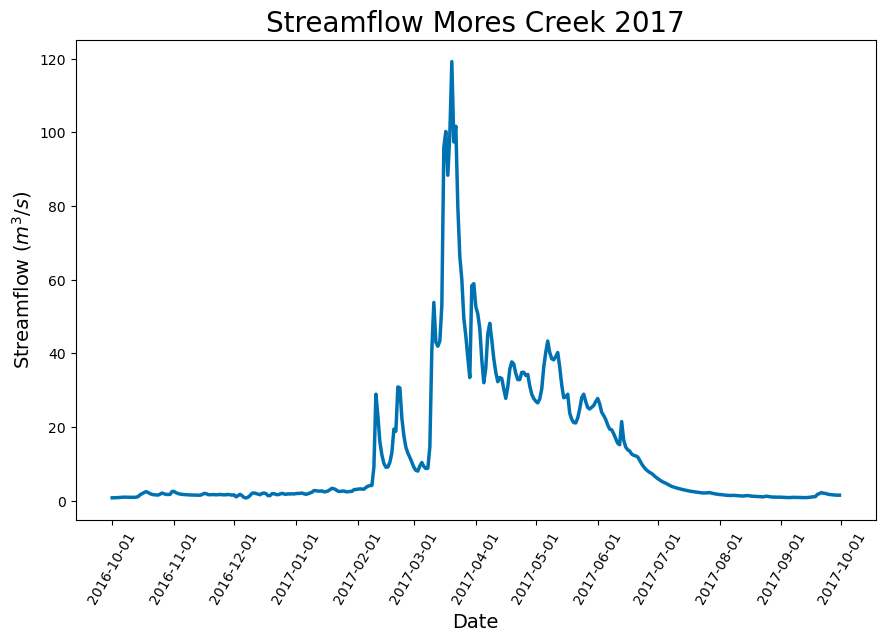

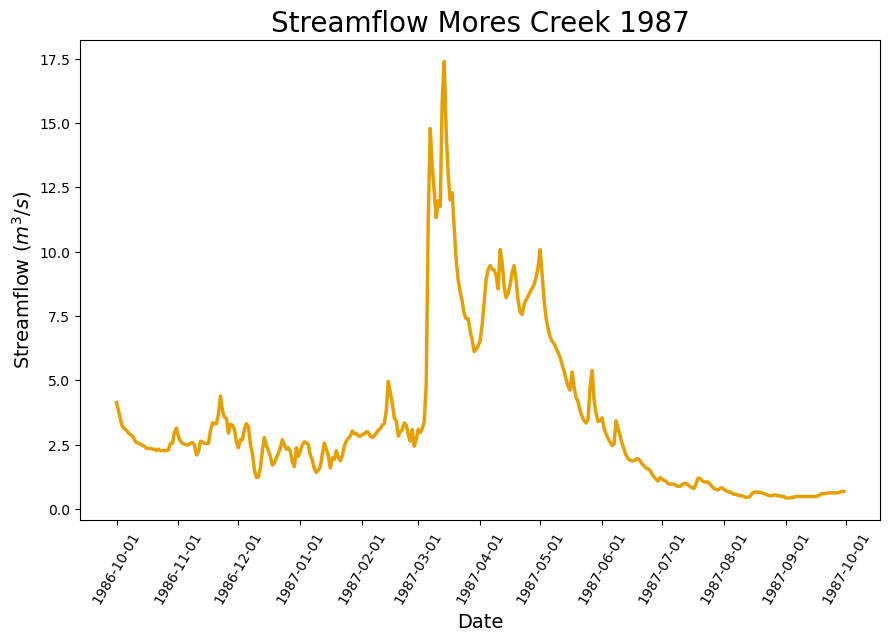

In [8]:
import matplotlib.dates as mdates
from matplotlib.ticker import MultipleLocator

#converting it to date time format
wy1_streamflow['date']=pd.to_datetime(wy1_streamflow['date'])
wy2_streamflow['date']=pd.to_datetime(wy2_streamflow['date'])

#two figures to look at data and verify
fig1 = plt.figure(figsize=(10, 6))
fig2= plt.figure(figsize=(10, 6))

ax1 = fig1.add_axes([0.1, 0.1, 0.8, 0.8])
ax2=fig2.add_axes([0.1, 0.1, 0.8, 0.8])

ax1.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax1.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax1.tick_params(axis='x',labelrotation=60)
ax2.xaxis.set_major_locator(mdates.MonthLocator(bymonthday=1))
ax2.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax2.tick_params(axis='x',labelrotation=60)

#plotting streamflow
ax1.plot(wy1_streamflow['date'],wy1_streamflow['q_cms'], c='#0072B2', lw=2.5, label='Mores Creek')
ax2.plot(wy2_streamflow['date'],wy2_streamflow['q_cms'], c='#E69F00', lw=2.5, label='Boise River')

ax1.set_title('Streamflow Mores Creek 2017', fontsize=20)
ax1.set_xlabel('Date', fontsize=14)
ax1.set_ylabel('Streamflow ($m^3/s$)', fontsize=14)
#ax1.legend(loc="upper right", fontsize=10)
ax2.set_title('Streamflow Mores Creek 1987', fontsize=20)
ax2.set_xlabel('Date', fontsize=14)
ax2.set_ylabel('Streamflow ($m^3/s$)', fontsize=14)

plt.show()

The max streamflow at Mores Creek was an order of magnitude higher in 2017 than in 1987. I graphed the streamflow by year to check the data and compare. This difference in maximum streamflow appears legitimate. The graphs follow the same pattern with limited flow for most of the year and a substantial melt event beginning in March. Clearly water year 2017 just received a lot more precipitation than 1987.

Now that I checked my graphs, I need to generate a bin size and do frequency counts for my data. Based on my max 2017 value, I want 20 bins from 0-120 cms or bin size of 5 cms.

In [9]:
bin_min=0 #min value 0
bin_max=120 #max value 120
bins=np.arange(bin_min,bin_max+5,5) #bin width 5 cms, defining first left edge and last right edge

counts_wy1, bin_edges_wy1 = np.histogram(wy1_streamflow['q_cms'],bins=bins) #counts for wy1
counts_wy2, bin_edges_wy2 = np.histogram(wy2_streamflow['q_cms'], bins=bins) #counts for wy2
#print to confirm
print("Bin edges:", bins)
print("Counts WY1:", counts_wy1)
print(sum(counts_wy1))
print("Counts WY2:", counts_wy2)
print(sum(counts_wy2))


Bin edges: [  0   5  10  15  20  25  30  35  40  45  50  55  60  65  70  75  80  85
  90  95 100 105 110 115 120]
Counts WY1: [220  21  18  11  14  19  20  12  10   4   4   2   1   1   0   1   0   1
   0   3   2   0   0   1]
365
Counts WY2: [293  56  14   2   0   0   0   0   0   0   0   0   0   0   0   0   0   0
   0   0   0   0   0   0]
365


Ok, now that I have counts with total count 365 (streamflow measured daily for one water year), I can create relative frequency plot.

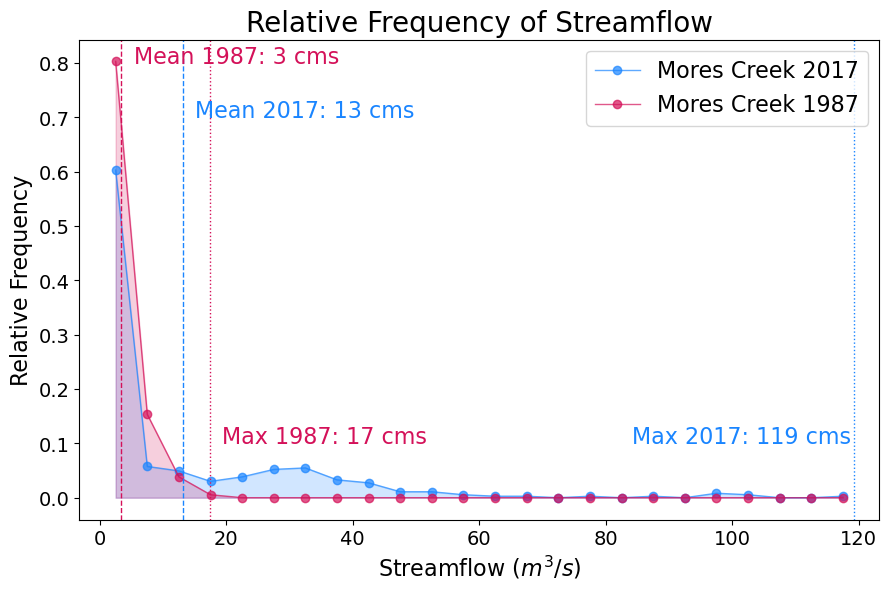

In [10]:
rel_freq_wy1=counts_wy1/sum(counts_wy1) #relative frequency for counts
rel_freq_wy2=counts_wy2/sum(counts_wy2)

mean_wy1=wy1_streamflow['q_cms'].mean() #average streamflow
mean_wy2=wy2_streamflow['q_cms'].mean()
max_wy1=wy1_streamflow['q_cms'].max() #maximum streamflow
max_wy2=wy2_streamflow['q_cms'].max()

bin_centers = 0.5 * (bin_edges_wy1[1:] + bin_edges_wy1[:-1]) #bin center for plotting

fig1= plt.figure(figsize=(10, 6))
ax1= fig1.add_axes([0.1, 0.1, 0.8, 0.8])
#actual dots for bins
ax1.plot(bin_centers, rel_freq_wy1, color='#1A85FF', marker='o', linestyle='-',linewidth=1,label='Mores Creek 2017', alpha=0.7)
ax1.plot(bin_centers, rel_freq_wy2, color='#D41159', marker='o',linestyle='-',linewidth=1,label='Mores Creek 1987', alpha=0.7)
#semi-transparent fill under the curve
ax1.fill_between(bin_centers, rel_freq_wy1, color='#1A85FF', alpha=0.2)
ax1.fill_between(bin_centers, rel_freq_wy2, color='#D41159', alpha=0.2)
#vertical line and label for mean and max
ax1.axvline(mean_wy1, color='#1A85FF', linestyle='dashed', linewidth=1)
ax1.axvline(mean_wy2, color='#D41159', linestyle='dashed', linewidth=1)
ax1.text(mean_wy1+2, 0.7, 'Mean 2017: {:.0f} cms'.format(mean_wy1), color='#1A85FF', fontsize=16)
ax1.text(mean_wy2+2, 0.8, 'Mean 1987: {:.0f} cms'.format(mean_wy2), color='#D41159', fontsize=16)
ax1.axvline(max_wy1, color='#1A85FF', linestyle='dotted', linewidth=1)
ax1.axvline(max_wy2, color='#D41159', linestyle='dotted', linewidth=1)
ax1.text(max_wy1-35, 0.1, 'Max 2017: {:.0f} cms'.format(max_wy1), color='#1A85FF', fontsize=16)
ax1.text(max_wy2+2, 0.1, 'Max 1987: {:.0f} cms'.format(max_wy2), color='#D41159', fontsize=16)
#increase font size for tick labels
ax1.tick_params(axis='both', which='major', labelsize=14)
#set plot and axes titles and legend
ax1.set_title('Relative Frequency of Streamflow', fontsize=20)
ax1.set_xlabel('Streamflow ($m^3/s$)', fontsize=16)
ax1.set_ylabel('Relative Frequency', fontsize=16)
ax1.legend(loc="upper right", fontsize=16)
plt.show()

#Generating Cumulative Distribution Function

0.86649408
0.48138559999999997
2.49471008
2.548512
46.43955200000002
9.4578112


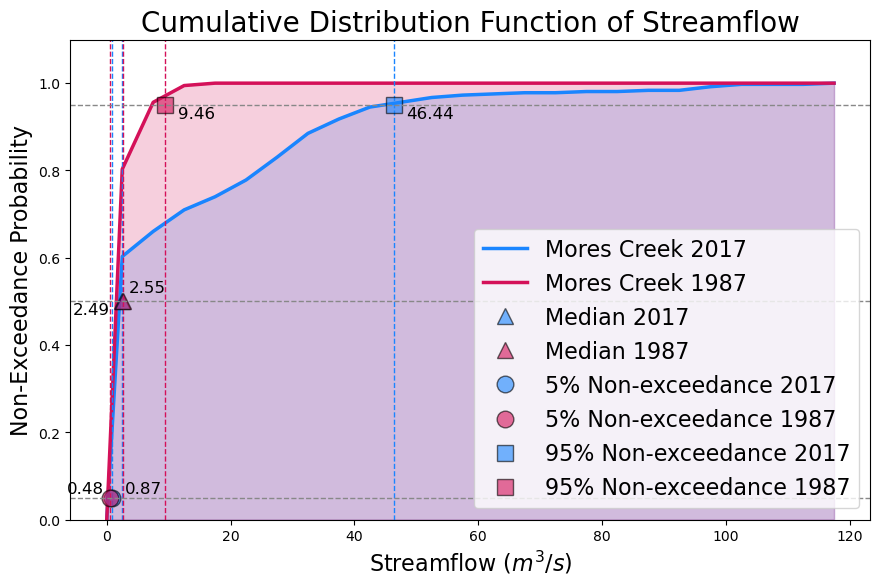

In [11]:
cdf_wy1=np.cumsum(rel_freq_wy1) #adds current count with all previous counts
cdf_wy1=np.hstack((0,cdf_wy1)) #add 0 to start
cdf_wy2=np.cumsum(rel_freq_wy2)
cdf_wy2=np.hstack((0,cdf_wy2))

bin_centers_cdf=np.hstack((bin_edges_wy1[0], bin_centers))#adds a 0 bin


#non-exceedance probabilities
NE5_wy1=wy1_streamflow['q_cms'].quantile(0.05)
NE5_wy2=wy2_streamflow['q_cms'].quantile(0.05)

med_wy1=wy1_streamflow['q_cms'].quantile(0.50)
med_wy2=wy2_streamflow['q_cms'].quantile(0.50)

NE95_wy1=wy1_streamflow['q_cms'].quantile(0.95)
NE95_wy2=wy2_streamflow['q_cms'].quantile(0.95)

#print confirm reasonable values
print(NE5_wy1)
print(NE5_wy2)

print(med_wy1)
print(med_wy2)

print(NE95_wy1)
print(NE95_wy2)


#new figure for cdf
fig2= plt.figure(figsize=(10, 6))
ax2= fig2.add_axes([0.1, 0.1, 0.8, 0.8])
#define plots
ax2.plot(bin_centers_cdf, cdf_wy1, color='#1A85FF', lw=2.5, label='Mores Creek 2017')
ax2.plot(bin_centers_cdf, cdf_wy2, color='#D41159', lw=2.5, label='Mores Creek 1987')
#semi-transparent fill under the curve
ax2.fill_between(bin_centers_cdf, cdf_wy1, color='#1A85FF', alpha=0.2)
ax2.fill_between(bin_centers_cdf, cdf_wy2, color='#D41159', alpha=0.2)
#I wanted y-axis a little higher so we could see top of curve
ax2.set_ylim(0,1.1)

ax2.set_title('Cumulative Distribution Function of Streamflow', fontsize=20)
ax2.set_xlabel('Streamflow ($m^3/s$)', fontsize=16)
ax2.set_ylabel('Non-Exceedance Probability', fontsize=16)

#lines and labels for 50% non-exceedance
ax2.axvline(med_wy1, color='#1A85FF', linestyle='dashed', linewidth=1)
ax2.plot(med_wy1, 0.5, '^', color='#1A85FF', markersize=12, alpha=0.6, markeredgecolor='k', markeredgewidth=1, label='Median 2017')
ax2.axvline(med_wy2, color='#D41159', linestyle='dashed', linewidth=1)
ax2.plot(med_wy2, 0.5, '^', color='#D41159', markersize=12, alpha=0.6, markeredgecolor='k', markeredgewidth=1, label='Median 1987')
ax2.text(med_wy1-8, 0.47, '{:.2f}'.format(med_wy1), color='k', fontsize=12)
ax2.text(med_wy2+1, 0.52, '{:.2f}'.format(med_wy2), color='k', fontsize=12)

#lines and labels for 5% non-exceedance
ax2.axvline(NE5_wy1, color='#1A85FF', linestyle='dashed', linewidth=1)
ax2.plot(NE5_wy1, 0.05, 'o', color='#1A85FF', markersize=12, alpha=0.6, markeredgecolor='k', markeredgewidth=1, label='5% Non-exceedance 2017')
ax2.axvline(NE5_wy2, color='#D41159', linestyle='dashed', linewidth=1)
ax2.plot(NE5_wy2, 0.05, 'o', color='#D41159', markersize=12 , alpha=0.6, markeredgecolor='k', markeredgewidth=1, label='5% Non-exceedance 1987')
ax2.text(NE5_wy1+2, 0.06, '{:.2f}'.format(NE5_wy1), color='k', fontsize=12)
ax2.text(NE5_wy2-7, 0.06, '{:.2f}'.format(NE5_wy2), color='k', fontsize=12)

#lines and labels for 95% non-exceedance
ax2.axvline(NE95_wy1, color='#1A85FF', linestyle='dashed', linewidth=1)
ax2.plot(NE95_wy1, 0.95, 's', color='#1A85FF', markersize=12, alpha=0.6, markeredgecolor='k', markeredgewidth=1, label='95% Non-exceedance 2017')
ax2.axvline(NE95_wy2, color='#D41159', linestyle='dashed', linewidth=1)
ax2.plot(NE95_wy2, 0.95, 's', color='#D41159', markersize=12, alpha=0.6, markeredgecolor='k', markeredgewidth=1, label='95% Non-exceedance 1987')
ax2.text(NE95_wy1+2, 0.92, '{:.2f}'.format(NE95_wy1), color='k', fontsize=12)
ax2.text(NE95_wy2+2, 0.92, '{:.2f}'.format(NE95_wy2), color='k', fontsize=12)

#horizontal lines at 5%, 50%, 95%
ax2.axhline(0.5, color='#888888', linestyle='dashed', linewidth=1)
ax2.axhline(0.05, color='#888888', linestyle='dashed', linewidth=1)
ax2.axhline(0.95, color='#888888', linestyle='dashed', linewidth=1)



ax2.legend(loc="lower right", fontsize=16)
plt.show()

## Instructions

Although you are towards the beginning of your research, you do need to demonstrate research progress. Your advisor has encouraged you to prepare a PowerPoint presentation the Pacific Northwest Water Summit in early November, and prepare some figures appropriate for a thesis proposal in the spring. As such, you need to efficiently create identical figures that are appropriate to both presentation and print formats. A manageable task that you can do by November is to plot both the empirical frequency distribution function (the histogram in frequency space) of the two years of streamflow data, as well as the associated cumulative density function (CDF). Your advisor agrees this is reasonable, but also wants you to highlight the mean of each year on the frequency distribution and the median flow, 5% non-exceedance, and 95% non-exceedance flows on the CDF. With this established you need a plan. __Your completed notebook should show 4 plots.__

#### Figure 1: Probability Density Plot

Compute the histograms of the daily streamflow data for each water year. We want to prepare a plot in which the frequency distributions share the same x-axis, so you'll need to do some sleuthing to figure out how you should use `np.histogram()`. You do some brainstorming and decide the plot should:

- Have all axes labelled, including units in SI format
- Have font sets and sizes that are appropriate to either a PowerPoint presentation or a print document
- Indicate the mean of each water year with a vertical line
- Use colors that are color-blind friendly
- Use gridlines appropriately
- Have a meaningful legend
- Save in a format like PNG

#### Figure 2: Cumulative Density Function Plot

With the histograms completed from above, you should now be able to calculate the CDF in a straightforward manner (you remember that the CDF is just the integral of the PDF from Probability and Statistics). So you come up with the requirements of the CDF plot, which are only slightly different than the PDF/histogram plot. You decide the plot should: 

- Have all axes labelled, including units in SI format
- Have font sets and sizes that are appropriate to either a PowerPoint presentation or a print document
- Indicate the median, 5%, and 95% non-exceedance values using both horizontal and vertical lines. Maybe do something fancy like intersect directly at the CDF. 
- Use colors that are color-blind friendly
- Use gridlines appropriately
- Have a meaningful legend
- Save in a format like PNG

At the very end of your 30-minute weekly advising check-in, your advisor closed their eyes, rubbed their temples intently, and spouted off the following `NumPy` and `Matplotlib` commands that should be helpful. 

In [ ]:
np.cumsum() # Or x.cumsum(), where x is a vector of data
np.percentile() 
np.histogram() 
# Note: When using np.histogram(), make sure to use the same bins for both data records.
# Consider using min(), max(), and linspace() to create custom bins.

plt.hlines()
plt.vlines()

## Reflection Questions:

1. Your advisor is a scatter-brain and flaky. They tell you to try a different gage, and different years after you show them your beautiful plots. How easy would it be to accomodate their ephemeral requests and what did you do to make it relatively painless?
2. The function `GetStreamFlowData` above looks more broadly useful, in that you can query different gages, and request multiple years of data. In class, we talked a bit about "defensive coding." Looking at the function above, identify 3 different errors a user (you) might make in calling that function and how you might use some defensive programming strategies to protect against those errors.


Different years, different gages:

It should be relatively easy. To change the analysis years, all we would need to do is change start and end dates for whatever years we want to analyze instead. If we want to keep all current years and add a new year and gage, we would need to run "GetStreamFlowData" one more time and create an array under a new name "wy3_streamflow," then duplicate each subsequent line of code to add a wy3 version to everything. For example, we had to make the system recognize the date column correctly after we pulled the date with this line: wy1_streamflow['date']=pd.to_datetime(wy1_streamflow['date'])

We would need to copy the line and modify as:
wy3_streamflow['date']=pd.to_datetime(wy3_streamflow['date'])

We would have to do this for every line of code for building the relative frequency and cdf arrays and for all plotting components to add it to the graph. Adding a third plot and year will be a signficantly greater effort than overwriting current plots by changing start and end dates at the very beginning.

We also defined the gage at the very beginning, so we would have to change this and rerun as well to accommodate the request. It's all easy unless the professor wants a gage other than one of the four we know about, in which case we'd have to go digging for gage numbers in NWIS.

Defensive coding:

Date format for start and end date could go horribly wrong. First piece of defensive coding could look like:

from datetime import datetime

try: date.strptime(startDate, '%Y-%m-%d')

except ValueError:

    print("Dates must be in the format YYYY-MM-DD")

**ChatBot told me how to do this. I wanted to do an assert statement, but there is no way to do an assert statement that can check date format. Instead we need to import the python datetime formatter and run the given start date through a "try" statement to that uses date.strptime to see if the input is in the format YYYY-MM-DD. If it is not, it will give a ValueError, which the "except" statement catches and prints a note for user on proper date format.


I noticed at the top that gage and parameter code are input into the function as strings. I would totally mess this up myself and just type digits... Here is a helpful check for the user:

assert type(gage) == str, "Input gage number as a string (enclosed with apostrophes)"
assert type(parameterCode) == str "Input parameter code as a string (enclosed in apostrophes)"

They might also not write the full gage number or use all 0s in the parameter code. Here is a way to catch that error:

assert len(gage) == 8, "Gage needs to be 8 digits including 0s."
assert len(parameterCode) == 5, "Parameter code needs to be 5 digits including leading and ending 0s."
